In [1]:
import pandas as pd  # 做数据分析
import numpy as np  # 数据处理
import matplotlib.pyplot as plt  # 绘图
from pynq import Overlay
from pynq import Xlnk
import time
overlay = Overlay('/home/xilinx/jupyter_notebooks/cnn/ip/cnn.bit')

In [2]:
#overlay?

In [3]:
cnn_ip=overlay.LetNet_0

In [4]:
#cnn_ip?

In [5]:
#cnn_ip.write?

In [6]:
xlnk=Xlnk()
input_buffer = xlnk.cma_array(shape=(1532), dtype=np.float32)
output_buffer=xlnk.cma_array(shape=(1532),dtype=np.float32)
input_buffer.flush()
output_buffer.flush()
print(input_buffer.physical_address)
print(output_buffer.physical_address)

402972672
402980864


In [7]:
cnn_ip.write(0x10,input_buffer.physical_address)
cnn_ip.write(0x18,output_buffer.physical_address)

In [8]:
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col0.txt', 'r') as f:
    file = f.read()
col0 = file.split()
col0 = np.array(col0, dtype=float)
print(col0.shape)
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col1.txt', 'r') as f:
    file = f.read()
col1 = file.split()
col1 = np.array(col1, dtype=float)
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col2.txt', 'r') as f:
    file = f.read()
col2 = file.split()
col2 = np.array(col2, dtype=float)
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col3.txt', 'r') as f:
    file = f.read()
col3 = file.split()
col3 = np.array(col3, dtype=float)
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col4.txt', 'r') as f:
    file = f.read()
col4 = file.split()
col4 = np.array(col4, dtype=float)
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col5.txt', 'r') as f:
    file = f.read()
col5 = file.split()
col5 = np.array(col5, dtype=float)
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col6.txt', 'r') as f:
    file = f.read()
col6 = file.split()
col6 = np.array(col6, dtype=float)
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col7.txt', 'r') as f:
    file = f.read()
col7= file.split()
col7 = np.array(col7, dtype=float)
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col8.txt', 'r') as f:
    file = f.read()
col8 = file.split()
col8 = np.array(col8, dtype=float)
with open('/home/xilinx/jupyter_notebooks/cnn/data/weights_1_02_70_col9.txt', 'r') as f:
    file = f.read()
col9 = file.split()
col9 = np.array(col9, dtype=float)

(1532,)


In [9]:
with open('/home/xilinx/jupyter_notebooks/cnn/data/1_0.2_70_noise1.txt', 'r') as f:
    file = f.read()
data = file.split()
data = np.array(data, dtype=float)
print(data.shape)
data = data.reshape(873, 10)
print(data.shape)

(8730,)
(873, 10)


In [10]:
data_out=np.zeros([873,10])
data_out.shape

(873, 10)

In [16]:
now_col=np.zeros([1532])
res=0
for col in range(0,10):
    if(col==0):
        np.copyto(now_col,col0)
    elif(col==1):
        np.copyto(now_col,col1)
    elif(col==2):
        np.copyto(now_col,col2)
    elif(col==3):
        np.copyto(now_col,col3)
    elif(col==4):
        np.copyto(now_col,col4)
    elif(col==5):
        np.copyto(now_col,col5)
    elif(col==6):
        np.copyto(now_col,col6)
    elif(col==7):
        np.copyto(now_col,col7)
    elif(col==8):
        np.copyto(now_col,col8)
    else:
        np.copyto(now_col,col9)
    
    for i in range(0,860,10):
        for j in range(0,10):
            now_col[1512+j]=data[i+j,col]#获取当前输入
            now_col[1522+j]=data[i+j+10,col]#获取标准输出
        start=time.time()
        np.copyto(input_buffer,now_col)
        cnn_ip.write(0x00,1)
        isready=cnn_ip.read(0x00)
        while(isready==1):
            isready=cnn_ip.read(0x00)
        np.copyto(now_col,output_buffer)
        end=time.time()
        cost_time=end-start
        for j in range(0,10):
            data_out[i+j,col]=now_col[1512+j]#获取当前输出
            res+=0.5*(data[i+j+10,col]-data_out[i+j,col])*(data[i+j+10,col]-data_out[i+j,col])
res/=230
print(res)
print()
for i in range(0,860):
    for j in range(0,10):
        print(data_out[i,j],end=" ")
    print()

0.00154175036781
0.385914206505 0.348328709602 0.185070604086 0.150340974331 0.000186801247764 0.448076754808 0.448286503553 0.441774278879 0.439128190279 0.189435198903 
0.382601350546 0.352017909288 0.186203479767 0.148470953107 0.000202784081921 0.447141468525 0.448410928249 0.446328371763 0.453239530325 0.190821185708 
0.382225066423 0.346092522144 0.185854747891 0.149718761444 0.000151960295625 0.446599215269 0.447382211685 0.445929586887 0.435782343149 0.192218825221 
0.384330570698 0.349438846111 0.184248059988 0.148017928004 0.000154465597006 0.452211678028 0.451428472996 0.447503268719 0.445297002792 0.189228788018 
0.387995392084 0.343341678381 0.185166329145 0.150496557355 0.000223616603762 0.449226230383 0.44898301363 0.447713166475 0.444725871086 0.189918667078 
0.388288080692 0.349553406239 0.186332091689 0.149319544435 0.000233998522162 0.450703650713 0.445476770401 0.443943440914 0.442947089672 0.192811071873 
0.382975429296 0.35556396842 0.185259744525 0.14896248281 0.

0.425520539284 0.391625910997 0.198987707496 0.166848808527 0.000177590438398 0.403029620647 0.402823626995 0.402121335268 0.402062922716 0.195252254605 
0.426327884197 0.39110442996 0.20032145083 0.169257164001 0.000186625373317 0.403233706951 0.403998225927 0.405816584826 0.40643748641 0.193818733096 
0.426684290171 0.393051594496 0.200808092952 0.168656438589 0.000202590192202 0.403087764978 0.402881801128 0.402912706137 0.403853029013 0.194314584136 
0.425371855497 0.391539305449 0.199987336993 0.168299913406 0.000151776504936 0.402033984661 0.404820501804 0.404438436031 0.403615534306 0.194636449218 
0.42290148139 0.391162067652 0.200258746743 0.167612358928 0.000154288660269 0.403998225927 0.406702250242 0.404322266579 0.40317556262 0.194199368358 
0.423973023891 0.391829818487 0.200711250305 0.167934462428 0.000223346316488 0.403058707714 0.403969347477 0.404555529356 0.403853029013 0.194752261043 
0.426654607058 0.391394853592 0.200027093291 0.167578816414 0.000233800470596 0.4

0.417043089867 0.384301960468 0.197632148862 0.165884912014 0.000372172420612 0.412014275789 0.41112613678 0.412809997797 0.410683453083 0.193972751498 
0.415501624346 0.381765425205 0.197190001607 0.166104480624 0.000170746905496 0.413936257362 0.410211861134 0.411155551672 0.411571025848 0.194789454341 
0.416093587875 0.382400780916 0.196419581771 0.165500491858 0.000177610854735 0.411276876926 0.412662476301 0.411008745432 0.413784980774 0.193897083402 
0.417104095221 0.382917672396 0.196168631315 0.165736064315 0.00018677994376 0.415619790554 0.412545502186 0.412427395582 0.413965314627 0.193839818239 
0.414733856916 0.382803052664 0.196168631315 0.165248647332 0.000202758528758 0.413994699717 0.409977346659 0.413697302341 0.412956893444 0.193592518568 
0.416837006807 0.381328225136 0.196131080389 0.165699884295 0.000151922853547 0.412073016167 0.414318919182 0.413018465042 0.412662476301 0.194428354502 
0.414644986391 0.381506800652 0.195786640048 0.165248647332 0.000154448076501 

0.404176056385 0.364618211985 0.189154148102 0.156446546316 0.000151776504936 0.427996754646 0.427162110806 0.42707234621 0.428383529186 0.192605704069 
0.401858985424 0.364791989326 0.18857857585 0.155819877982 0.000154288660269 0.42766726017 0.427907854319 0.428324252367 0.426475822926 0.192377179861 
0.401888012886 0.364735543728 0.188449919224 0.15665577352 0.000223374561756 0.426624923944 0.427697002888 0.427132844925 0.42638745904 0.192905575037 
0.402414977551 0.364167630672 0.189154148102 0.156544014812 0.000233800470596 0.42707234621 0.428324252367 0.429433137178 0.426862508059 0.192905575037 
0.402121335268 0.364111840725 0.189600914717 0.156494572759 0.000187556346646 0.429163008928 0.427548915148 0.427818119526 0.42802631855 0.1920658499 
0.401477515697 0.36532625556 0.188726946712 0.156415522099 0.000372307549696 0.429103076458 0.428264170885 0.428564250469 0.427311003208 0.192218825221 
0.403498649597 0.362856894732 0.188745290041 0.156703665853 0.000170847066329 0.427937

0.431350857019 0.399808913469 0.197688668966 0.162719756365 0.00037256377982 0.397580564022 0.39819958806 0.398608148098 0.397815346718 0.194010481238 
0.434793829918 0.400538355112 0.197613045573 0.161219224334 0.000170949700987 0.399634420872 0.394928187132 0.39448928833 0.403673708439 0.191916644573 
0.432609051466 0.399370491505 0.196590304375 0.162222266197 0.000177856112714 0.391712993383 0.396092504263 0.395801126957 0.399401158094 0.194296330214 
0.431440234184 0.398900926113 0.19439060986 0.161038607359 0.000186537188711 0.396762043238 0.399808913469 0.393937408924 0.396588146687 0.193934589624 
0.432998239994 0.40088942647 0.199831232429 0.16551682353 0.000202494178666 0.397493004799 0.39875382185 0.399634420872 0.396498650312 0.194160535932 
0.431231379509 0.399108588696 0.199144333601 0.164692178369 0.000151704763994 0.398405313492 0.397786170244 0.393472850323 0.395743340254 0.194028809667 
0.430298417807 0.398900926113 0.201062694192 0.164860382676 0.000154214867507 0.398

0.416718512774 0.384037822485 0.1966278404 0.168776497245 0.000151922853547 0.413106203079 0.410801023245 0.412662476301 0.413873821497 0.197150737047 
0.416597366333 0.383206009865 0.196902796626 0.165951654315 0.000154448076501 0.413666933775 0.411955058575 0.409830331802 0.414230972528 0.195691272616 
0.421294212341 0.381450176239 0.197536513209 0.166646227241 0.000223565875785 0.412249237299 0.413488477468 0.413164675236 0.414850711823 0.194504290819 
0.420285463333 0.380667567253 0.195595949888 0.168018728495 0.000233971659327 0.414673954248 0.411244064569 0.412398427725 0.412633091211 0.192774251103 
0.415590643883 0.380467414856 0.195978134871 0.167304262519 0.000187711790204 0.410918831825 0.412927508354 0.413547843695 0.417163670063 0.194085747004 
0.41772466898 0.381299883127 0.196378320456 0.166612014174 0.000372648471966 0.414821743965 0.411955058575 0.413697302341 0.412219852209 0.193535640836 
0.415353834629 0.385309696198 0.19595696032 0.167253673077 0.000170968996827 0.

0.403263449669 0.364959686995 0.19050437212 0.157170087099 0.000372086942662 0.425162196159 0.428324252367 0.421918183565 0.426475822926 0.193705931306 
0.40217974782 0.364449709654 0.187073886395 0.158259615302 0.000170700237504 0.42320021987 0.42320021987 0.42432948947 0.425731927156 0.192218825221 
0.403853029013 0.365016162395 0.189997762442 0.157607331872 0.000177547117346 0.427162110806 0.426357805729 0.424358814955 0.427637785673 0.192698851228 
0.405671000481 0.363859385252 0.188707470894 0.15798586607 0.000186712510185 0.426209032536 0.426446586847 0.429222822189 0.430872291327 0.192180112004 
0.405348420143 0.365242063999 0.190446987748 0.156175360084 0.000202689261641 0.427459031343 0.429641604424 0.424597918987 0.426624923944 0.192358523607 
0.404468506575 0.366228163242 0.189172685146 0.156799137592 0.000151847285451 0.422305077314 0.42913287878 0.429820239544 0.424776285887 0.192774251103 
0.403853029013 0.365185767412 0.190372243524 0.1565605551 0.000154375011334 0.42728

0.429252117872 0.396910637617 0.199163511395 0.161268651485 0.000154465597006 0.395190954208 0.395016044378 0.396092504263 0.40182992816 0.194142311811 
0.430782258511 0.401328295469 0.19840374589 0.162122294307 0.000223591545364 0.397967547178 0.395511090755 0.399779945612 0.399750202894 0.195347473025 
0.429879397154 0.399750202894 0.196998178959 0.159793093801 0.000233998522162 0.39866694808 0.396064043045 0.399195969105 0.398288756609 0.194218233228 
0.43293890357 0.403911173344 0.196476131678 0.160216495395 0.000187733137864 0.394198030233 0.40373596549 0.397406756878 0.392529338598 0.192546948791 
0.425342053175 0.402561038733 0.195252254605 0.162206083536 0.000372648471966 0.395539879799 0.394869625568 0.397435516119 0.394667208195 0.192274272442 
0.432400286198 0.401153534651 0.19465470314 0.160412505269 0.000171009800397 0.396004527807 0.397406756878 0.396498650312 0.394869625568 0.194847166538 
0.430722922087 0.398112684488 0.194142311811 0.161759868264 0.000177960639121 0.40

0.417134046555 0.387274235487 0.195861563087 0.169051125646 0.000170968996827 0.413577288389 0.412249237299 0.408769935369 0.413106203079 0.195041105151 
0.425280302763 0.385741472244 0.198422834277 0.167153120041 0.000177920257556 0.40930044651 0.411453068256 0.410595864058 0.409505695105 0.192274272442 
0.424388438463 0.382889181376 0.198192536831 0.166511684656 0.000186106844922 0.410948187113 0.413873821497 0.414792388678 0.417547345161 0.193611308932 
0.420581877232 0.384991675615 0.196494594216 0.166915953159 0.000202095718123 0.411482572556 0.41186735034 0.415530771017 0.413903295994 0.192718029022 
0.413518816233 0.381592601538 0.196998178959 0.166999667883 0.00015133805573 0.408590525389 0.412131309509 0.414171338081 0.414968907833 0.192294090986 
0.418858379126 0.382860779762 0.196264132857 0.168080180883 0.000153848290211 0.407619655132 0.410095125437 0.411097288132 0.418413668871 0.193345874548 
0.423794776201 0.381154567003 0.198480963707 0.167185977101 0.000222734248382 0

0.406260877848 0.367480963469 0.188914448023 0.156303629279 0.000154269393533 0.41939213872 0.423703610897 0.42766726017 0.423022031784 0.191028535366 
0.401299387217 0.360693782568 0.18786855042 0.158831119537 0.000223320923396 0.424477279186 0.428564250469 0.422334611416 0.42796716094 0.191310867667 
0.402764886618 0.365410923958 0.191423177719 0.157623171806 0.000233744241996 0.422541856766 0.426058232784 0.424538910389 0.428056061268 0.191935271025 
0.406555563211 0.370545774698 0.187647998333 0.15803322196 0.000187534911674 0.421769410372 0.424269199371 0.421947181225 0.423407465219 0.191708505154 
0.39857968688 0.365748912096 0.189677581191 0.159479573369 0.000372307549696 0.420285463333 0.426714599133 0.427340954542 0.420078486204 0.191708505154 
0.401065021753 0.364819675684 0.187740162015 0.15939900279 0.000170807586983 0.422423690557 0.425042778254 0.423466295004 0.42742934823 0.193705931306 
0.406936854124 0.367368340492 0.190579161048 0.156158536673 0.00017767380632 0.42877

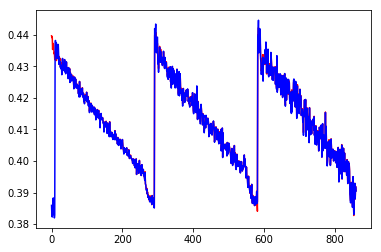

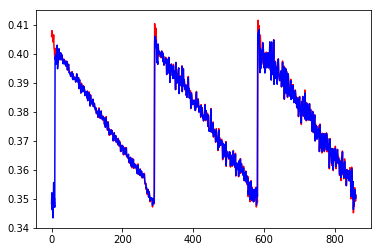

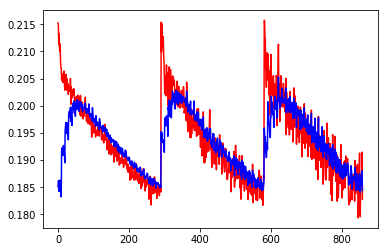

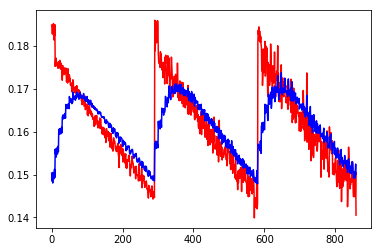

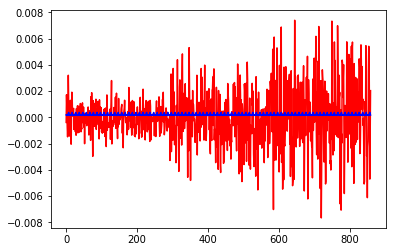

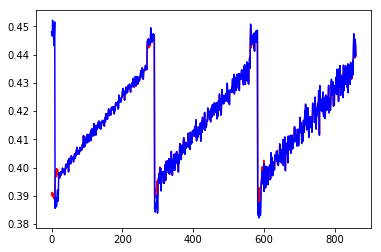

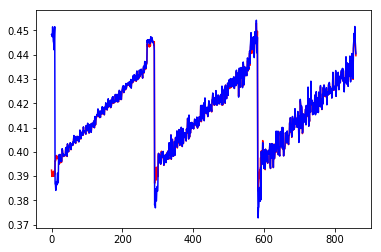

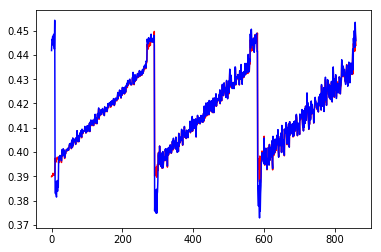

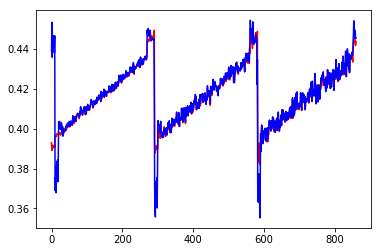

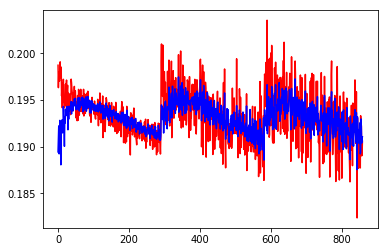

In [15]:
predict = []
for i in range(0, 860):
    predict.append(data_out[i, :])
predict_test = np.array(predict)

true = []
for i in range(10, 870):
    true.append(data[i, :])
true = np.array(true)

for i in range(0, 10):
    plt.plot(true[:, i], c='red')
    plt.plot(predict_test[:, i], c='blue')
    plt.show()